In [2]:
import pandas as pd
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib as mpl
import math
import re
import os
from colour import Color
from cycler import cycler
from IPython.core.display import display, HTML

In [3]:
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': False})
sns.set_style('whitegrid')

In [4]:
year = 2018
event = 'dh'
gender = 'f'
topX = 10
splits = 5 # Could detect this from dataset, or or they always 5? @todo
image_gen = False
dpi = 300

In [5]:
from config import races

In [6]:
dfs = {}
for race in races[year]:
    racename = races[year][race]['name']
    raceName = races[year][race]['title']

    directory = event + str(race) + '_' + racename
    if os.path.exists(directory):
        file_prefix = str(year) + '_' + event + str(race) + '_' + racename + '_' + gender
        file_prefix = os.path.join( directory, file_prefix )

        dfs[race] = pd.read_csv( file_prefix + '.merged.csv', index_col=0 )

In [7]:
chart_title_prefix = str(year) + ' Season, ' + ( 'Men' if gender == 'm' else 'Women' )

In [8]:
def formatDelta( time ):
    return ':'.join(str(time).split(':')[1:3])[:-3]

In [9]:
def convertToDelta( timestring ):
    timestring = str(timestring)

    if ":" not in timestring:
        timestring = str( cRound( timestring ) )
        timestring = "0:" + timestring

    timestring = "0:" + timestring

    return pd.to_timedelta( timestring )

In [10]:
def cRound( flt ):
    return float( Decimal( flt ).quantize( Decimal('.001' ), rounding=ROUND_HALF_UP ) )

In [11]:
def secondsToRaceTime( seconds ):
    return '%2dm%02ds' % divmod( seconds, 60 )

In [12]:
def colorList( col1, col2, cnt, pos1=0, pos2=1, pos3=2 ):
    clrs = list( Color( col1 ).range_to( Color( col2 ) , cnt ) )
    clrs = [ i.web for i in clrs ]
    if pos1 < cnt:
        clrs[pos1] = 'gold'
    if pos2 < cnt:
        clrs[pos2] = 'silver'
    if pos3 < cnt:
        clrs[pos3] = 'peru'

    return clrs

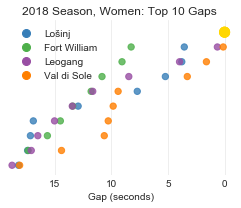

In [13]:
df = dfs[1]
legs = {}
col = 'split5_vs_winner'
title = chart_title_prefix + ': Top ' + str(topX) + ' Gaps '
timeCol = False
xlabel = 'Gap (seconds)'
labelPosOffsetX = .1
minX = False
maxX = False

pltY = 3 * math.ceil( topX / 10 )
pltX = 2.5 * math.ceil( topX / 10 )+1
plt.subplots(figsize=(pltX,pltY))
#     plt.subplots()

if False == minX:
    minX = df[col][:topX].max()+1
if False == maxX:
    maxX = -.9


for race in dfs:
#     http://www.r-graph-gallery.com/38-rcolorbrewers-palettes/
    color = Color(rgb=sns.color_palette("Set1", 10)[race]).web
    colors = [color]*(len(df[col]))
    colors[int(df.loc[df['rank'] == 1].index.values)] = "gold"
    sizes = [40]*(len(df[col]))
    sizes[int(df.loc[df['rank'] == 1].index.values)] = 100

    # Build the chart
    plot = sns.regplot( y=dfs[race].index.values[0:topX], x=dfs[race][col][0:topX], fit_reg=False, scatter_kws={'color': colors, 's': sizes} )

    legs[race] = mlines.Line2D( [], [], color=color, marker='o', markersize=8, label=races[year][race]['title'], linestyle='' )


plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( minX, maxX )

# Format the chart
sns.despine()
plot.yaxis.set_visible(False)
plot.set_frame_on(False)
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( title=title, xlabel=xlabel )


plt.legend( handles=list(legs.values()) )
        
plt.tight_layout()

# xticks = [ secondsToRaceTime( int(t.get_text()) ) if 'm' not in t.get_text() else t.get_text() for t in plot.get_xticklabels() ]
# plot.set_xticklabels( xticks )

if image_gen:
#     plt.gcf().subplots_adjust(left=0.3)
    plt.savefig( file_prefix + '_top_' + str(topX) + '_gaps.png', dpi=dpi )

In [14]:
dfs[3].head()

,bib,id,name,q_rank,q_speed,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,speed,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,Protected,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age
0,2,2002,ATHERTON Rachel,16,49.86,74.580,116.942,160.266,212.906,249.889,2,40,Finished,10003434487,NaN,200.0,1.0,36.98,51.093,92.842,135.011,186.012,221.141,10.0,8.0,Finished,200.0,-28.748,37.0,22.124,0.000,31.0,19.111,0.000,42.362,1.0,0.000,0.000,30.0,20.540,0.000,43.324,3.0,1.429,0.000,18.0,21.165,0.000,52.640,3.0,1.043,0.000,16.0,22.661,0.000,36.983,5.0,1.496,0.000,1.0,0.000,0.000,1.0,0.000,0.000,41.749,2.0,0.492,0.000,1.0,0.000,0.000,42.169,1.0,0.000,0.000,2.0,0.503,0.000,51.001,2.0,1.004,0.000,1.0,0.000,0.000,35.129,2.0,0.715,0.000,10.272222,0.722222,10.0,3.0,1987-12-06T00:00:00,WE,ATHERTON,Rachel,1197024565271777,GBR,NCh,ATHERTON Rachel,False,0,2,ATHERTON R,2,48630000,GBR19871206,5,10003434487,TDH,1598,TREK FACTORY RACING DH,2,30
1,1,2001,NICOLE Myriam,5,50.49,52.456,103.344,146.517,202.422,238.608,1,41,Finished,10004535237,20.0,160.0,2.0,36.18,51.993,93.250,135.512,185.509,221.779,13.0,5.0,Finished,180.0,-16.829,1.0,0.000,-22.124,8.0,5.513,-13.598,50.888,32.0,8.526,8.526,5.0,6.791,-13.749,43.173,2.0,1.278,-0.151,7.0,10.681,-10.484,55.905,14.0,4.308,3.265,5.0,11.380,-11.281,36.186,3.0,0.699,-0.797,2.0,0.900,0.900,2.0,0.408,0.408,41.257,1.0,0.000,-0.492,2.0,0.501,0.501,42.262,2.0,0.093,0.093,1.0,0.000,-0.503,49.997,1.0,0.000,-1.004,2.0,0.638,0.638,36.270,4.0,1.856,1.141,10.050000,0.944444,12.0,2.0,1990-02-08T00:00:00,WE,NICOLE,Myriam,1197024565271776,FRA,WCL,NICOLE Myriam,False,0,1,NICOLE M,1,48600000,FRA19900208,1,10004535237,CVN,1590,COMMENCAL / VALLNORD,1,28
2,6,2006,HANNAH Tracey,2,50.98,55.436,99.536,143.504,195.101,230.608,5,37,Finished,10003732258,40.0,140.0,3.0,35.50,52.512,94.542,137.550,190.704,225.118,16.0,2.0,Finished,180.0,-5.490,3.0,2.980,-19.144,2.0,1.705,-17.406,44.100,5.0,1.738,1.738,2.0,3.778,-16.762,43.968,5.0,2.073,0.644,2.0,3.360,-17.805,51.597,1.0,0.000,-1.043,2.0,3.380,-19.281,35.507,2.0,0.020,-1.476,3.0,1.419,1.419,3.0,1.700,1.700,42.030,3.0,0.773,0.281,3.0,2.539,2.539,43.008,4.0,0.839,0.839,3.0,5.195,4.692,53.154,6.0,3.157,2.153,3.0,3.977,3.977,34.414,1.0,0.000,-0.715,9.861111,1.133333,13.0,1.0,1988-06-13T00:00:00,WE,HANNAH,Tracey,1197024565271780,AUS,NCh,HANNAH Tracey,False,0,6,HANNAH T,5,48720000,AUS19880613,3,10003732258,URT,1608,POLYGON UR,6,30
3,9,2009,HRASTNIK Monika,4,49.48,56.999,100.942,144.646,198.395,235.390,8,34,Finished,10017602955,25.0,125.0,4.0,36.99,55.303,99.647,142.596,194.214,229.597,14.0,4.0,Finished,150.0,-

In [28]:
range( 2, len(dfs)+1 )

range(2, 5)

In [31]:
dfm = dfs[1].copy()

sfxs = [ '_' + str(i) for i in list(dfs.keys())[1:] ]

for i in range( 2, len(dfs)+1 ):
    dfm = dfm.merge( dfs[i], left_on='uci', right_on='uci', how='inner', suffixes=['','_' + str(i)] )


In [32]:
dfm.head()

,bib,id,name,q_rank,q_speed,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,speed,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,Protected,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age,bib_2,id_2,name_2,q_rank_2,q_speed_2,q_split1_2,q_split2_2,q_split3_2,q_split4_2,q_split5_2,q_start_2,q_start_rev_2,q_status_2,q_points_2,r_points_2,rank_2,speed_2,split1_2,split2_2,split3_2,split4_2,split5_2,start_2,start_rev_2,status_2,points_2,qr_diff_2,q_split1_rank_2,q_split1_vs_best_2,q_split1_vs_winner_2,q_split2_rank_2,q_split2_vs_best_2,q_split2_vs_winner_2,q_split2_sector_2,q_split2_sector_rank_2,q_split2_sector_vs_best_2,q_split2_sector_vs_winner_2,q_split3_rank_2,q_split3_vs_best_2,q_split3_vs_winner_2,q_split3_sector_2,q_split3_sector_rank_2,q_split3_sector_vs_best_2,q_split3_sector_vs_winner_2,q_split4_rank_2,q_split4_vs_best_2,q_split4_vs_winner_2,q_split4_sector_2,q_split4_sector_rank_2,q_split4_sector_vs_best_2,q_split4_sector_vs_winner_2,q_split5_rank_2,q_split5_vs_best_2,q_split5_vs_winner_2,q_split5_sector_2,q_split5_sector_rank_2,q_split5_sector_vs_best_2,q_split5_sector_vs_winner_2,split1_rank_2,split1_vs_best_2,split1_vs_winner_2,split2_rank_2,split2_vs_best_2,split2_vs_winner_2,split2_sector_2,split2_sector_rank_2,split2_sector_vs_best_2,split2_sector_vs_winner_2,split3_rank_2,split3_vs_best_2,split3_vs_winner_2,split3_sector_2,split3_sector_rank_2,split3_sector_vs_best_2,split3_sector_vs_winner_2,split4_rank_2,split4_vs_best_2,split4_vs_winner_2,split4_sector_2,split4_sector_rank_2,split4_sector_vs_best_2,split4_sector_vs_winner_2,split5_rank_2,split5_vs_best_2,split5_vs_winner_2,split5_sector_2,split5_sector_rank_2,split5_sector_vs_best_2,split5_sector_vs_winner_2,speed_ms_2,speed_ms_vs_best_2,speed_rank_2,q_speed_rank_2,BirthDate_2,CategoryCode_2,FamilyName_2,GivenName_2,Id_2,Nation_2,Outfit_2,PrintName_2,Protected_2,RaceId_2,RaceNr_2,ScoreboardName_2,StartOrder_2,StartTime_2,UciCode_2,UciRank_2,UciRiderId_2,UciTeamCode_2,UciTeamId_2,UciTeamName_2,WorldCupRank_2,Age_2,bib_3,id_3,name_3,q_rank_3,q_speed_3,q_split1_3,q_split2_3,q_split3_3,q_split4_3,q_split5_3,q_start_3,q_start_rev_3,q_status_3,q_points_3,r_points_3,rank_3,speed_3,split1_3,split2_3,split3_3,split4_3,split5_3,start_3,start_rev_3,status_3,points_3,qr_diff_3,q_split1_rank_3,q_split1_vs_best_3,q_split1_vs_winner_3,q_split2_rank_3,q_split2_vs_best_3,q_split2_vs_winner_3,q_split2_sector_3,q_split2_sector_rank_3,q_split2_sector_vs_best_3,q_split2_sector_vs_winner_3,q_split3_rank_3,q_split3_vs_best_3,q_split3_vs_winner_3,q_split3_sector_3,q_split3_sector_rank_3,q_split3_sec

In [ ]:
# sum( [ dfm[split + rc].fillna(1000) for rc in [ '', '_2', '_3' ] ] )

In [33]:
# dfb = pd.DataFrame()
dfd = {
    'name': 'PERFECT Run'
}
for rc in dfs:
    for sp in range( 1, splits+1 ):
        split = 'split' + str(sp) + ( '_' + str(rc) if rc > 1 else '' )
        dfd[split] = dfm[split].min()
        if ( sp > 1 ):
            sector = 'split' + str(sp) + '_sector' + ( '_' + str(rc) if rc > 1 else '' )
            dfd[sector] = dfm[sector].min()
    dfd['points' + ( '_' + str(rc) if rc > 1 else '' )] = 1000
            
dfb = pd.DataFrame( list(dfd.values()) ).T
# list(dfb.values())
dfb.columns = list(dfd.keys())
dfb.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3,split1_4,split2_4,split2_sector_4,split3_4,split3_sector_4,split4_4,split4_sector_4,split5_4,split5_sector_4,points_4
0,PERFECT Run,22.847,60.224,36.752,92.252,32.028,135.352,42.971,160.706,24.788,1000,64.814,211.338,146.524,240.134,28.796,281.291,41.123,310.96,29.669,1000,51.093,92.842,41.257,135.011,42.169,185.509,49.997,221.141,34.414,1000,62.457,139.384,76.848,180.25,39.475,229.674,48.542,266.424,34.83,1000


In [ ]:
# dfm.sort_values( 'split5_t', ascending=True, inplace=True )
# dfm.reset_index( drop=True, inplace=True )
# dfm.head()

In [34]:
list(dfd.keys())
data = dfm[ list(dfd.keys()) ][:topX].copy()
data = data.append( dfb ).sort_values( 'split5' ).reset_index( drop=True )
data.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3,split1_4,split2_4,split2_sector_4,split3_4,split3_sector_4,split4_4,split4_sector_4,split5_4,split5_sector_4,points_4
0,NICOLE Myriam,23.472,60.224,36.752,92.252,32.028,135.352,43.1,160.706,25.354,230,65.404,216.908,151.504,247.122,30.214,288.983,41.861,319.211,30.228,200,51.993,93.25,41.257,135.512,42.262,185.509,49.997,221.779,36.27,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,PERFECT Run,22.847,60.224,36.752,92.252,32.028,135.352,42.971,160.706,24.788,1000,64.814,211.338,146.524,240.134,28.796,281.291,41.123,310.96,29.669,1000,51.093,92.842,41.257,135.011,42.169,185.509,49.997,221.141,34.414,1000,62.457,139.384,76.848,180.25,39.475,229.674,48.542,266.424,34.83,1000
2,ATHERTON Rachel,22.847,61.748,38.901,95.397,33.649,139.415,44.018,164.265,24.85,210,65.12,218.276,153.156,247.811,29.535,289.281,41.47,320.016,30.735,190,51.093,92.842,41.749,135.011,42.169,186.012,51.001,221.141,35.129,200,62.457,139.384,76.927,180.25,40.866,229.674,49.424,266.547,36.873,176
3,SEAGRAVE Tahnee,22.902,61.248,38.346,95.686,34.438,139.696,44.01,164.484,24.788,156,64.814,211.338,146.524,240.134,28.796,281.291,41.157,310.96,29.669,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,63.486,140.565,77.079,182.349,41.784,231.242,48.893,266.424,35.182,240
4,CABIROU Marine,24.295,63.484,39.189,97.391,33.907,140.362,42.971,165.935,25.573,150,68.834,219.147,150.313,249.423,30.276,291.659,42.236,321.782,30.123,141,58.361,104.181,45.82,147.22,43.039,201.998,54.778,240.655,38.657,45,67.545,145.561,78.016,192.22,46.659,243.324,51.104,280.823,37.499,65


In [35]:
for sp in range( 1, splits+1 ):
    split = 'split' + str(sp)
#     rsplit = split + ( '_' + str(rc) if rc > 1 else '' )
    data[split + '_sector_t'] = sum( [ data[split + ( '_sector' if sp > 1 else '' ) + rc].fillna(1000) for rc in [ '' ] + [ '_' + str(i) for i in range( 2, len(dfs)+1 ) ] ] )
    data[split + '_t'] = sum( [ data[split + rc].fillna(1000) for rc in [ '' ] + [ '_' + str(i) for i in range( 2, len(dfs)+1 ) ] ] )
data['points_t'] = sum( [ data['points' + rc].fillna(0) for rc in [ '' ] + [ '_' + str(i) for i in range( 2, len(dfs)+1 ) ] ] )
data['points_t_rank'] = data['points_t'].rank( method='dense', ascending=False )
data['rank_t'] = data['split5_t'].rank( method='dense', ascending=True )
data = data.sort_values( 'split5_t' ).reset_index( drop=True )

data.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3,split1_4,split2_4,split2_sector_4,split3_4,split3_sector_4,split4_4,split4_sector_4,split5_4,split5_sector_4,points_4,split1_sector_t,split1_t,split2_sector_t,split2_t,split3_sector_t,split3_t,split4_sector_t,split4_t,split5_sector_t,split5_t,points_t,points_t_rank,rank_t
0,PERFECT Run,22.847,60.224,36.752,92.252,32.028,135.352,42.971,160.706,24.788,1000,64.814,211.338,146.524,240.134,28.796,281.291,41.123,310.96,29.669,1000,51.093,92.842,41.257,135.011,42.169,185.509,49.997,221.141,34.414,1000,62.457,139.384,76.848,180.25,39.475,229.674,48.542,266.424,34.83,1000,201.211,201.211,301.381,503.788,142.468,647.647,182.633,831.826,123.701,959.231,4000.0,1.0,1.0
1,ATHERTON Rachel,22.847,61.748,38.901,95.397,33.649,139.415,44.018,164.265,24.85,210,65.12,218.276,153.156,247.811,29.535,289.281,41.47,320.016,30.735,190,51.093,92.842,41.749,135.011,42.169,186.012,51.001,221.141,35.129,200,62.457,139.384,76.927,180.25,40.866,229.674,49.424,266.547,36.873,176,201.517,201.517,310.733,512.250,146.219,658.469,185.913,844.382,127.587,971.969,776.0,2.0,2.0
2,HANNAH Tracey,23.703,63.029,39.326,97.077,34.048,153.333,56.256,178.898,25.565,95,69.64,221.078,151.438,251.784,30.706,292.907,41.123,322.744,29.837,135,52.512,94.542,42.03,137.55,43.008,190.704,53.154,225.118,34.414,180,65.874,144.738,78.864,185.3,40.562,234.888,49.588,269.718,34.83,150,211.729,211.729,311.658,523.387,148.324,671.711,200.121,871.832,124.646,996.478,560.0,5.0,3.0
3,HRASTNIK Monika,25.733,67.321,41.588,101.54,34.219,147.683,46.143,173.635,25.952,107,70.924,228.648,157.724,259.526,30.878,301.992,42.466,334.228,32.236,49,55.303,99.647,44.344,142.596,42.949,194.214,51.618,229.597,35.383,150,67.478,144.326,76.848,183.801,39.475,232.343,48.542,268.029,35.686,190,219.438,219.438,320.504,539.942,147.521,687.463,188.769,876.232,129.257,1005.489,496.0,6.0,4.0
4,CABIROU Marine,24.295,63.484,39.189,97.391,33.907,140.362,42.971,165.935,25.573,150,68.834,219.147,150.313,249.423,30.276,291.659,42.236,321.782,30.123,141,58.361,104.181,45.82,147.22,43.039,201.998,54.778,240.655,38.657,45,67.545,145.561,78.016,192.22,46.659,243.324,51.104,280.823,37.499,65,219.035,219.035,313.338,532.373,153.881,686.254,191.089,877.343,131.852,1009.195,401.0,8.0,5.0


In [36]:
data.sort_values( 'split5_t', ascending=True, inplace=True )
data.reset_index( drop=True, inplace=True )
data.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3,split1_4,split2_4,split2_sector_4,split3_4,split3_sector_4,split4_4,split4_sector_4,split5_4,split5_sector_4,points_4,split1_sector_t,split1_t,split2_sector_t,split2_t,split3_sector_t,split3_t,split4_sector_t,split4_t,split5_sector_t,split5_t,points_t,points_t_rank,rank_t
0,PERFECT Run,22.847,60.224,36.752,92.252,32.028,135.352,42.971,160.706,24.788,1000,64.814,211.338,146.524,240.134,28.796,281.291,41.123,310.96,29.669,1000,51.093,92.842,41.257,135.011,42.169,185.509,49.997,221.141,34.414,1000,62.457,139.384,76.848,180.25,39.475,229.674,48.542,266.424,34.83,1000,201.211,201.211,301.381,503.788,142.468,647.647,182.633,831.826,123.701,959.231,4000.0,1.0,1.0
1,ATHERTON Rachel,22.847,61.748,38.901,95.397,33.649,139.415,44.018,164.265,24.85,210,65.12,218.276,153.156,247.811,29.535,289.281,41.47,320.016,30.735,190,51.093,92.842,41.749,135.011,42.169,186.012,51.001,221.141,35.129,200,62.457,139.384,76.927,180.25,40.866,229.674,49.424,266.547,36.873,176,201.517,201.517,310.733,512.250,146.219,658.469,185.913,844.382,127.587,971.969,776.0,2.0,2.0
2,HANNAH Tracey,23.703,63.029,39.326,97.077,34.048,153.333,56.256,178.898,25.565,95,69.64,221.078,151.438,251.784,30.706,292.907,41.123,322.744,29.837,135,52.512,94.542,42.03,137.55,43.008,190.704,53.154,225.118,34.414,180,65.874,144.738,78.864,185.3,40.562,234.888,49.588,269.718,34.83,150,211.729,211.729,311.658,523.387,148.324,671.711,200.121,871.832,124.646,996.478,560.0,5.0,3.0
3,HRASTNIK Monika,25.733,67.321,41.588,101.54,34.219,147.683,46.143,173.635,25.952,107,70.924,228.648,157.724,259.526,30.878,301.992,42.466,334.228,32.236,49,55.303,99.647,44.344,142.596,42.949,194.214,51.618,229.597,35.383,150,67.478,144.326,76.848,183.801,39.475,232.343,48.542,268.029,35.686,190,219.438,219.438,320.504,539.942,147.521,687.463,188.769,876.232,129.257,1005.489,496.0,6.0,4.0
4,CABIROU Marine,24.295,63.484,39.189,97.391,33.907,140.362,42.971,165.935,25.573,150,68.834,219.147,150.313,249.423,30.276,291.659,42.236,321.782,30.123,141,58.361,104.181,45.82,147.22,43.039,201.998,54.778,240.655,38.657,45,67.545,145.561,78.016,192.22,46.659,243.324,51.104,280.823,37.499,65,219.035,219.035,313.338,532.373,153.881,686.254,191.089,877.343,131.852,1009.195,401.0,8.0,5.0


In [37]:
# https://seaborn.pydata.org/examples/pairgrid_dotplot.html
# display( list(dfm.columns ))
# data = dfm[[ 'name', 'rank', 'split1', 'split2_sector', 'split3_sector', 'split4_sector', 'split5_sector']].copy()
# best = pd.DataFrame( [[ 'PERFECT Run', 0, dfm['split1'].min(), dfm['split2_sector'].min(), dfm['split3_sector'].min(), dfm['split4_sector'].min(), dfm['split5_sector'].min() ]], columns=data.columns )
# data = data.append( best ).sort_values( 'rank' ).reset_index( drop=True )

# Expand data set
data['split1_sector'] = data['split1_t']
# for i in range( 2, splits+1 ):
#     data['split' + str(i)] = data['split' + str(i-1) + '_t'] + data['split' + str(i) + '_sector_t']
for i in range( 1, splits+1 ):
    split = 'split' + str(i) + '_t'
    sector = split[:-2] + '_sector_t'
    data[split + '_rank'] = data[split].rank(method='dense')
    data[split + '_vs_best'] = (data[split] - data[split].min())
    data[sector + '_rank'] = data[sector].rank(method='dense')
    data[sector + '_vs_best'] = (data[sector] - data[sector].min())
data['rank'] = data['split5_t_rank']
data = data.sort_values( 'split5_t_vs_best' ).reset_index( drop=True )

data.head(20)

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,points,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,points_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,points_3,split1_4,split2_4,split2_sector_4,split3_4,split3_sector_4,split4_4,split4_sector_4,split5_4,split5_sector_4,points_4,split1_sector_t,split1_t,split2_sector_t,split2_t,split3_sector_t,split3_t,split4_sector_t,split4_t,split5_sector_t,split5_t,points_t,points_t_rank,rank_t,split1_sector,split1_t_rank,split1_t_vs_best,split1_sector_t_rank,split1_sector_t_vs_best,split2_t_rank,split2_t_vs_best,split2_sector_t_rank,split2_sector_t_vs_best,split3_t_rank,split3_t_vs_best,split3_sector_t_rank,split3_sector_t_vs_best,split4_t_rank,split4_t_vs_best,split4_sector_t_rank,split4_sector_t_vs_best,split5_t_rank,split5_t_vs_best,split5_sector_t_rank,split5_sector_t_vs_best,rank
0,PERFECT Run,22.847,60.224,36.752,92.252,32.028,135.352,42.971,160.706,24.788,1000,64.814,211.338,146.524,240.134,28.796,281.291,41.123,310.96,29.669,1000,51.093,92.842,41.257,135.011,42.169,185.509,49.997,221.141,34.414,1000,62.457,139.384,76.848,180.25,39.475,229.674,48.542,266.424,34.83,1000,201.211,201.211,301.381,503.788,142.468,647.647,182.633,831.826,123.701,959.231,4000.0,1.0,1.0,201.211,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0
1,ATHERTON Rachel,22.847,61.748,38.901,95.397,33.649,139.415,44.018,164.265,24.85,210,65.12,218.276,153.156,247.811,29.535,289.281,41.47,320.016,30.735,190,51.093,92.842,41.749,135.011,42.169,186.012,51.001,221.141,35.129,200,62.457,139.384,76.927,180.25,40.866,229.674,49.424,266.547,36.873,176,201.517,201.517,310.733,512.250,146.219,658.469,185.913,844.382,127.587,971.969,776.0,2.0,2.0,201.517,2.0,0.306,2.0,0.306,2.0,8.462,2.0,9.352,2.0,10.822,2.0,3.751,2.0,12.556,2.0,3.280,2.0,12.738,3.0,3.886,2.0
2,HANNAH Tracey,23.703,63.029,39.326,97.077,34.048,153.333,56.256,178.898,25.565,95,69.64,221.078,151.438,251.784,30.706,292.907,41.123,322.744,29.837,135,52.512,94.542,42.03,137.55,43.008,190.704,53.154,225.118,34.414,180,65.874,144.738,78.864,185.3,40.562,234.888,49.588,269.718,34.83,150,211.729,211.729,311.658,523.387,148.324,671.711,200.121,871.832,124.646,996.478,560.0,5.0,3.0,211.729,3.0,10.518,3.0,10.518,3.0,19.599,3.0,10.277,3.0,24.064,4.0,5.856,3.0,40.006,6.0,17.488,3.0,37.247,2.0,0.945,3.0
3,HRASTNIK Monika,25.733,67.321,41.588,101.54,34.219,147.683,46.143,173.635,25.952,107,70.924,228.648,157.724,259.526,30.878,301.992,42.466,334.228,32.236,49,55.303,99.647,44.344,142.596,42.949,194.214,51.618,229.597,35.383,150,67.478,144.326,76.848,183.801,39.475,232.343,48.542,268.029,35.686,190,219.438,219.438,320.504,539.942,147.521,687.463,188.769,876.232,129.257,1005.489,496.0,6.0,4.0,219.438,7.0,18.227,7.0,18.227,6.0,36.154,5.0,19.123,5.0,39.816,3.0,5.053,4.0,44.406,3.0,6.136,4.0,46.258,4.0,5.556,4.0
4,CABIROU Marine,24.295,63.484,39.189,97.391,33.907,140.362,42.971,165.935,25.573,150,68.834,219.147,150.313,249.423,30.276,291.659,42.236,321.782,30.123,141,58.361,104.181,45.82,147.22,43.039,201.998,54.778,240.655,38.657,45,67.545,145.561,78.016,192.22,46.659,243.324,51.104,280.823,37.499,65,219.035,219.035,313.338,532.373,153.881,686.254,191.089,877.343,131.852,1009.195,401.0,8.0,5.0,219.035,6.0,17.824,6.0,17.824,4.0,28.585,4.0,11.957,4.0,38.607,6.0,11.413,5.0,45.517,5.0,8.456,5.0,49.964,5.0,8.151,5.0
5,SIEGENTHALER Emilie,24.839,70.361,45.522,106.006,35.645,151.454,45.448,177.593,26.139,94,69.004,221.473,152.469,252.675,31.202,295.47,42.795,326.604,31.134,82,54.994,98.833,43.839,143.45,44.617,195.311,51.861,232.78,37.469,140,68.201,147.534,79.333,188.947,41.413,239.247,50.3,276.698,37.451,110,217.038,217.038,321.163,538.201,152.877,691.078,190.404,881.482,132.193,1013.675,426.0,7.0,6.0,217.038,4.0,15.827,4.0,15.827,5.0,34.413,6.0,19.782,6.0,43

In [38]:
topX = 8
topX

8

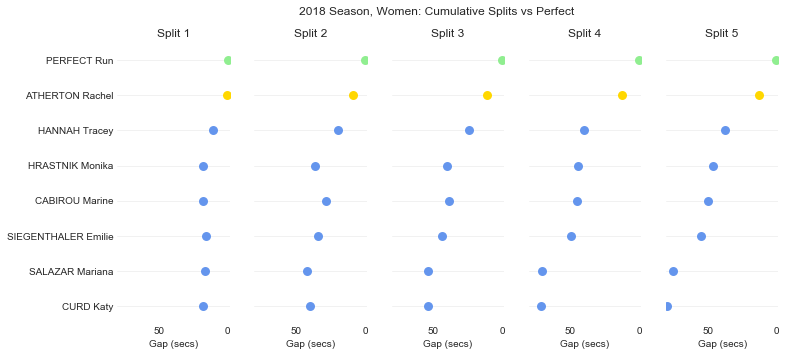

In [39]:
## Rearrange columns
data = data.sort_values( 'split5_t_rank' ).reset_index( drop=True )
data = data[list(data.columns[:2]) + list(sorted(data.columns[2:]))]

# Colors
first = int(data.loc[data['points_t_rank'] == 2].index.values)
second = int(data.loc[data['points_t_rank'] == 3].index.values)
third = int(data.loc[data['points_t_rank'] == 4].index.values)
colors = colorList( '#6495ED', '#6495ED', len(data), first, second, third )
colors[0] = 'lightgreen'

# Make the PairGrid
g = sns.PairGrid( data[:topX], x_vars=['split1_t_vs_best', 'split2_t_vs_best', 'split3_t_vs_best', 'split4_t_vs_best', 'split5_t_vs_best'],
                 y_vars=["name"], size=5, aspect=.4 )

# Draw a dot plot using the stripplot function
# colors = colorList( '#6495ED', '#6495ED', len(data), 1, 2, 3 )
# clrs = [ colors, colors, colors, colors, colors ]
# colors[0] = 'lightgreen'
g.map( sns.stripplot, size=9, orient='h', palette=colors, edgecolor='gray', marker='o' )

# (data[:topX]['split5_t_vs_best'].max()+1, -1.5)
# Use the same x axis limits on all columns and add better labels
# g.set( xlim=(30,-1.5), xlabel="Gap (secs)", ylabel="" ) # xlim=(0, 25), # MENS
g.set( xlim=(data[:topX]['split5_t_vs_best'].max()+1, -1.5), xlabel="Gap (secs)", ylabel="" )

# Use semantically meaningful titles for the columns
titles = ["Split 1", "Split 2", "Split 3", "Split 4", "Split 5"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid( False )
    ax.yaxis.grid( color='#EEEEEE' )

# Chart Visuals
sns.despine( left=True, bottom=True )
plt.subplots_adjust( top=0.88 )
g.fig.suptitle( chart_title_prefix + ': Cumulative Splits vs Perfect' )

# Image export
if image_gen:
    plt.gcf().subplots_adjust(left=0.22)
    plt.savefig( file_prefix + '_cumulative_splits.png', dpi=dpi )

In [ ]:
# data.points_t_rank.iloc[19] = 0

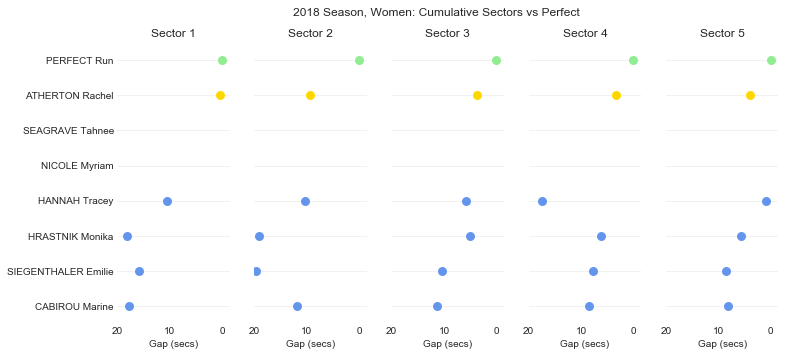

In [44]:
## Rearrange columns
# data['rank'] = data['split5_sector_t_rank']
data = data.sort_values( 'points_t_rank' ).reset_index( drop=True )
data = data[list(data.columns[:2]) + list(sorted(data.columns[2:]))]

# Make the PairGrid
colors = colorList( '#6495ED', '#6495ED', len(data), 1, 2, 3 )
colors[0] = 'lightgreen'
g = sns.PairGrid( data[:topX], x_vars=['split1_sector_t_vs_best', 'split2_sector_t_vs_best', 'split3_sector_t_vs_best', 'split4_sector_t_vs_best', 'split5_sector_t_vs_best'],
                 y_vars=["name"], size=5, aspect=.4 )

# Draw a dot plot using the stripplot function
g.map( sns.stripplot, size=9, orient='h', palette=colors, edgecolor='gray', marker='o' )

# (data[:topX]['split5_t_vs_best'].max()+1, -1.5)
# Use the same x axis limits on all columns and add better labels
g.set( xlim=(20,-1.5), xlabel="Gap (secs)", ylabel="" ) # xlim=(0, 25),

# Use semantically meaningful titles for the columns
titles = ["Sector 1", "Sector 2", "Sector 3", "Sector 4", "Sector 5"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid( False )
    ax.yaxis.grid( color='#EEEEEE' )

# Chart Visuals
sns.despine( left=True, bottom=True )
plt.subplots_adjust( top=0.88 )
g.fig.suptitle( chart_title_prefix + ': Cumulative Sectors vs Perfect' )

# Image export
if image_gen:
    plt.gcf().subplots_adjust(left=0.22)
    plt.savefig( file_prefix + '_cumulative_sectors.png', dpi=dpi )

---

In [41]:
if True:
    dfm.to_csv( file_prefix + '.season.csv' )
    data.to_csv( file_prefix + '.season.totals.csv' )
